In [1]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import fftpack
import PIL
from PIL import Image,ImageEnhance
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola, threshold_triangle)
from skimage import img_as_ubyte

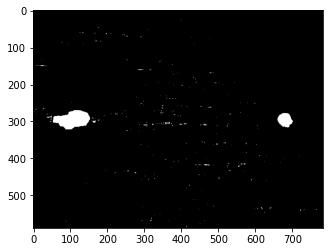

In [2]:
image = cv.imread('i5.jpg',0)
window_size =25
thresh_otsu=threshold_otsu(image)
binary_otsu = image > thresh_otsu
binary_otsu =img_as_ubyte(binary_otsu)
cv.imwrite('binary_otsu5.jpg', binary_otsu)


thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
binary_niblack = image > thresh_niblack
binary_niblack = img_as_ubyte(binary_niblack)
cv.imwrite('binary_niblack5.jpg', binary_niblack)

thresh_sauvola = threshold_sauvola(image, window_size=window_size)
binary_sauvola = image > thresh_sauvola
binary_sauvola =img_as_ubyte(binary_sauvola)
cv.imwrite('binary_sauvola5.jpg', binary_sauvola)

thresh_triangle=threshold_triangle(image)
binary_triangle = image > thresh_triangle
binary_triangle =img_as_ubyte(binary_triangle)
cv.imwrite('binary_triangle5.jpg', binary_triangle)

dst = cv.fastNlMeansDenoising(binary_niblack,30,50,10) 
plt.imshow(binary_niblack, cmap='gray')

dst = cv.fastNlMeansDenoising(binary_sauvola,30,50,10) 
plt.imshow(binary_sauvola, cmap='gray')

dst = cv.fastNlMeansDenoising(binary_otsu,30,50,10) 
plt.imshow(binary_otsu, cmap='gray')

dst = cv.fastNlMeansDenoising(binary_triangle,30,50,10) 
plt.imshow(binary_triangle, cmap='gray')

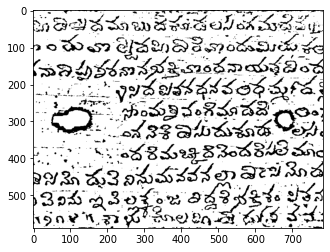

In [3]:
out_image = binary_sauvola
image = cv.imread('i5.jpg',0)
gt_image = cv.imread('binary_sauvola5.jpg',0)
plt.imshow(gt_image, cmap='gray')

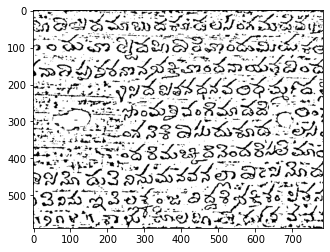

In [4]:
out_image1 = binary_niblack
image1 = cv.imread('i5.jpg',0)
gt_image1 = cv.imread('binary_niblack5.jpg',0)
plt.imshow(gt_image1, cmap='gray')

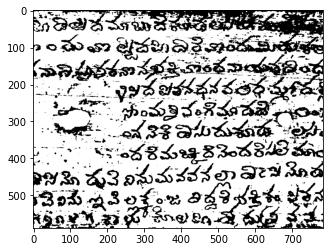

In [5]:
out_image2 = binary_niblack
image2 = cv.imread('i5.jpg',0)
gt_image2 = cv.imread('binary_otsu5.jpg',0)
plt.imshow(gt_image2, cmap='gray')

In [6]:
fm = []
#image = rgb2gray(image)
image = np.uint8(np.floor(image))
#gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image))
rows, columns = gt_image.shape
fp = np.count_nonzero(np.greater(gt_image, out_image))
fn = np.count_nonzero(np.greater(out_image, gt_image))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image, out_image), np.equal(gt_image, np.zeros((rows, columns)))))
tn = np.count_nonzero(np.logical_and(np.equal(out_image,gt_image), np.equal(out_image, np.zeros((rows, columns)))))
accuracy=(tp+tn)/(tp+fp+fn+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)
print (fp) 
print (tp)
print (fn) 
print (fm*100)
print (accuracy*100) 
print (recall*100)
print (precision*100) 

31859
53664
72626
[50.67111084]
50.67111083833381
42.49267558793254
62.74803269295979


In [7]:
fm = []
#image = rgb2gray(image)
image = np.uint8(np.floor(image1))
#gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image1))
rows, columns = gt_image1.shape
fp = np.count_nonzero(np.greater(gt_image1, out_image1))
fn = np.count_nonzero(np.greater(out_image1, gt_image1))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image1, out_image1), np.equal(gt_image1, np.zeros((rows, columns)))))
tn = np.count_nonzero(np.logical_and(np.equal(out_image1,gt_image1), np.equal(out_image1, np.zeros((rows, columns)))))
accuracy=(tp+tn)/(tp+fp+fn+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)
print (fp) 
print (tp)
print (fn) 
print (fm*100)
print (accuracy*100) 
print (recall*100)
print (precision*100) 

31780
54309
88855
[47.37909646]
47.37909645675302
37.93481601519935
63.08471465576322


In [8]:
fm = []
#image = rgb2gray(image)
image = np.uint8(np.floor(image2))
#gt_image = rgb2gray(gt_image)
gt_image = np.uint8(np.floor(gt_image2))
rows, columns = gt_image2.shape
fp = np.count_nonzero(np.greater(gt_image2, out_image2))
fn = np.count_nonzero(np.greater(out_image2, gt_image2))
tp = np.count_nonzero(np.logical_and(np.equal(gt_image2, out_image2), np.equal(gt_image2, np.zeros((rows, columns)))))
tn = np.count_nonzero(np.logical_and(np.equal(out_image2,gt_image2), np.equal(out_image2, np.zeros((rows, columns)))))
accuracy=(tp+tn)/(tp+fp+fn+tn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
fscore = ((2*recall*precision)/(precision+recall))
fm.append(fscore)
fm = np.array(fm)
print (fp) 
print (tp)
print (fn) 
print (fm*100)
print (accuracy*100) 
print (recall*100)
print (precision*100) 

38370
47719
121409
[37.39484439]
37.39484438732529
28.214724942055717
55.4298458571943


In [9]:
import cv2
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio

MSE = mean_squared_error(image2, gt_image2)
PSNR = peak_signal_noise_ratio(image2, gt_image2)
print('MSE: ', MSE)
print('PSNR: ', PSNR)

MSE:  21597.33994082327
PSNR:  4.7868009676155365


In [10]:
MSE = mean_squared_error(image, gt_image)
PSNR = peak_signal_noise_ratio(image, gt_image)
print('MSE: ', MSE)
print('PSNR: ', PSNR)

MSE:  21597.33994082327
PSNR:  4.7868009676155365


In [11]:
MSE = mean_squared_error(image1, gt_image1)
PSNR = peak_signal_noise_ratio(image1, gt_image1)
print('MSE: ', MSE)
print('PSNR: ', PSNR)

MSE:  25221.18431122449
PSNR:  4.1131488498479145
